# Wine classification
## 2조 - 김진서 박금령 최민성

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

plt.rc('font', family='Malgun Gothic') # 한글폰트 사용

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P2/src/wine.png' width=800/>

In [3]:
data = pd.read_csv('wine_dataset.csv')

data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 데이터탐색

|	변수명	|	설명	|	구분	|
|----|----|----|
|		**style**	 	|	 *red or white*	|	**Target**	|
|		**quality**	 	|	 *와인의 질*	|	**Target**	|
|		fixed_acidity 	|	 산도	|	feature	|
|	volatile_acidity	 	|	 휘발성 산	|	feature	|
|	citric_acid 	|	 시트르산	|	feature	|
|	residual_sugar	 	|	 잔여 당분	|	feature	|
|		chlorides 	|	 염화물	|	feature	 |
|	free_sulfur_dioxide	 	|	 독립 이산화황	|	feature	|
|	total_sulfur_dioxide	 	|	 총 이산화황	|	feature	|
|		density 	|	 밀도	|	feature	|
|		pH	 	|	 수소이온 농도	|	feature	|
|		sulphates 	|	 황산염	|	feature	|
|		alcohol	 	|	 도수	|	feature	|





In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [6]:
data['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [7]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## 데이터 전처리

### quality classification 오류해결
- train하는 모든 features의 type이 numeric
- style컬럼을 number형 변환

In [8]:
# style컬럼 object-> number 형 변환
data.loc[data['style'] == 'red', 'style'] = 0
data.loc[data['style'] == 'white', 'style'] = 1

In [9]:
data['style'] = data['style'].astype('int64')

### XGB model 오류해결
- Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]
- quality의 범주값 0부터 시작하도록 변경

In [10]:
data['quality'] = data['quality'] - 3

data['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: xlabel='quality', ylabel='Count'>

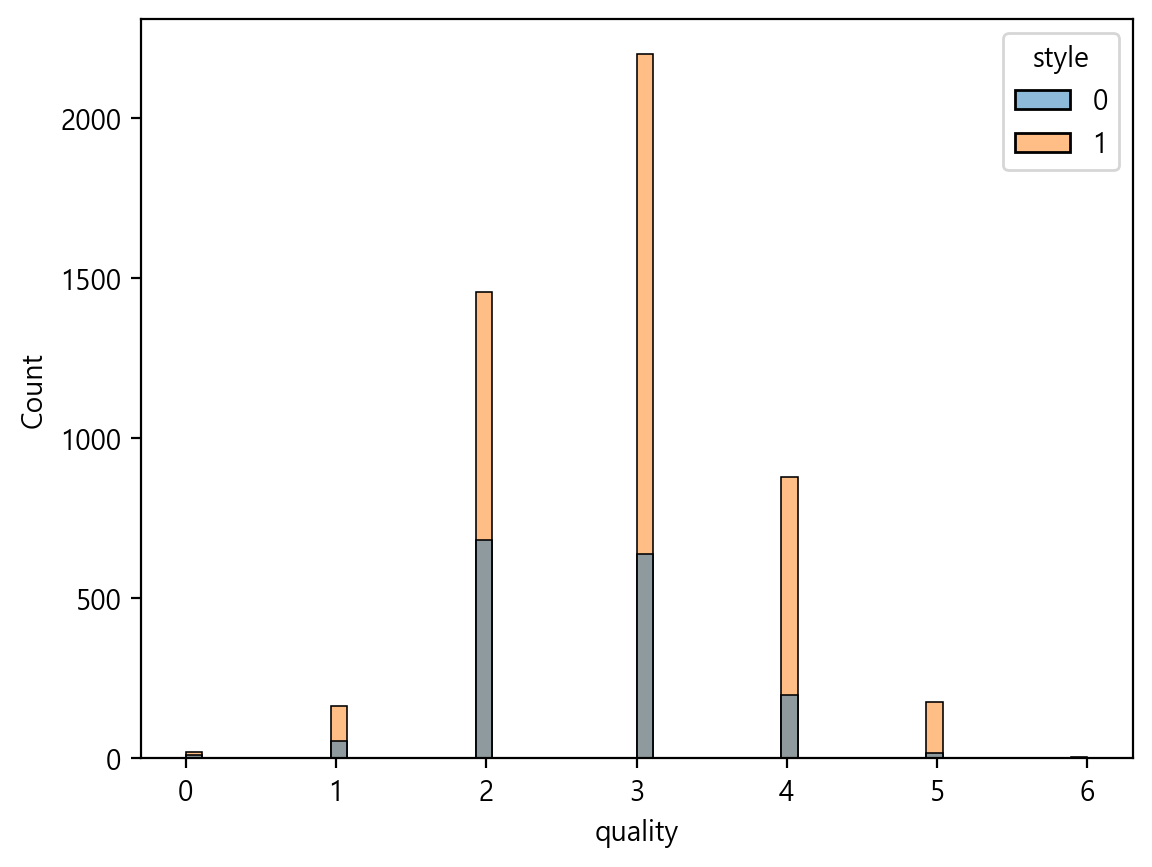

In [12]:
sns.histplot(x = data['quality'], hue = data['style'])

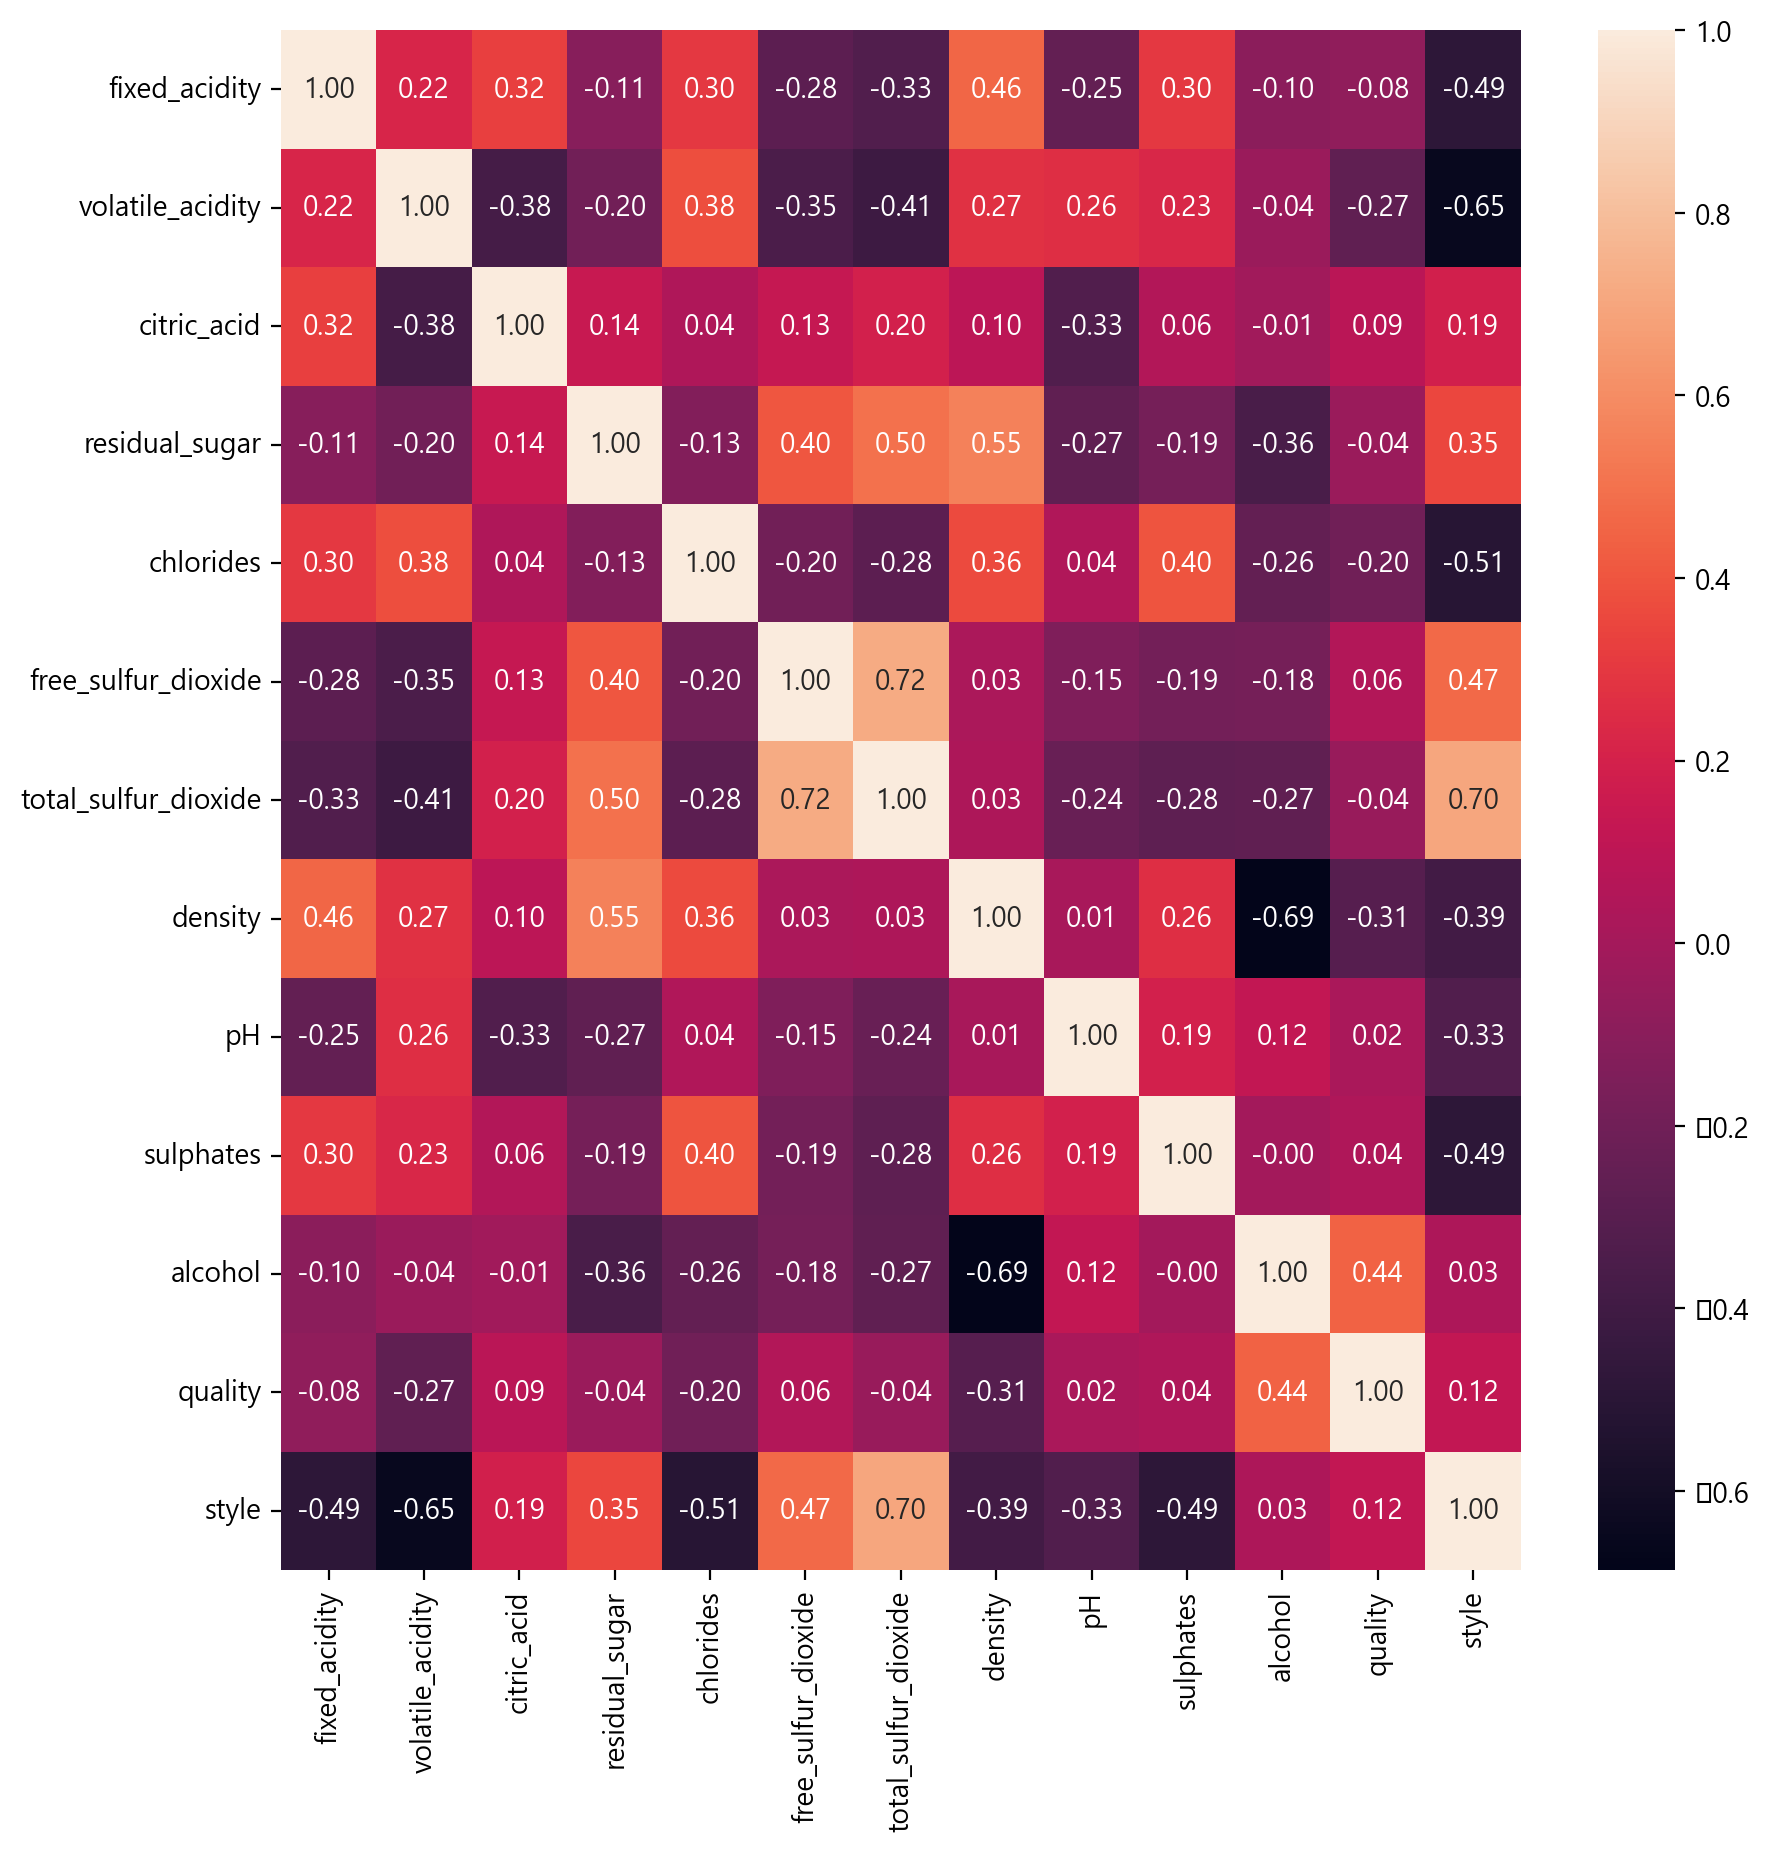

In [13]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.show()

## Classification

## 1. style classification
- target : style(red or white)
- 즉, 0 or 1로 표현할 수 있으므로 LogisticRegression 적합

In [14]:
# x/y split
target = 'style'

x = data.drop(target, axis = 1)
y = data[target]

In [15]:
# train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [16]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
data.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0


In [18]:
# model : LogisticRegression
from sklearn.linear_model import LogisticRegression

model_s = LogisticRegression()

model_s.fit(x_train, y_train)

y_pred = model_s.predict(x_test)

In [19]:
# verification
from sklearn.metrics import *

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9851282051282051
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       473
           1       0.98      1.00      0.99      1477

    accuracy                           0.99      1950
   macro avg       0.99      0.97      0.98      1950
weighted avg       0.99      0.99      0.99      1950



In [21]:
model_s.predict_proba(x_test)

array([[0.01606283, 0.98393717],
       [0.00121907, 0.99878093],
       [0.00272139, 0.99727861],
       ...,
       [0.46956213, 0.53043787],
       [0.04936418, 0.95063582],
       [0.0064142 , 0.9935858 ]])

## 2. quality classification
- target : quality (3 ~ 9)
- style 컬럼을 number화(전처리 o)
- 분류모델들 중, 최적 model 찾기

In [22]:
# x/y split
target = 'quality'

x = data.drop(target, axis = 1)
y = data[target]

In [23]:
# train/test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [24]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
# KNN hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# max_depth : 1 ~ 10
param = {'n_neighbors' : range(1, 21)}

# model

model = KNeighborsClassifier()

model = GridSearchCV(model, param, cv = 5)

model.fit(x_train, y_train)

print(f'최적 n_neighbors : {model.best_params_}')

최적 n_neighbors : {'n_neighbors': 1}


In [26]:
# best_params_ KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [27]:
# verification
from sklearn.metrics import *

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

result = {}
result['KNN'] = accuracy_score(y_test, y_pred) 

0.6082051282051282
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.28      0.25      0.27        67
           2       0.68      0.64      0.66       677
           3       0.61      0.64      0.63       815
           4       0.56      0.59      0.58       325
           5       0.36      0.36      0.36        55
           6       0.00      0.00      0.00         4

    accuracy                           0.61      1950
   macro avg       0.36      0.36      0.36      1950
weighted avg       0.61      0.61      0.61      1950



In [28]:
# DecisionTree hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# max_depth : 1 ~ 10
param = {'max_depth' : range(1, 11)}

# model

model = DecisionTreeClassifier()

model = GridSearchCV(model, param, cv = 5)

model.fit(x_train, y_train)

print(f'최적 max_depth : {model.best_params_}')

최적 max_depth : {'max_depth': 10}


In [29]:
# best_params_ DecisionTree

model = DecisionTreeClassifier(max_depth = model.best_params_['max_depth'])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [30]:
# verification
from sklearn.metrics import *

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

result['DecisionTree'] = accuracy_score(y_test, y_pred) 

0.5666666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.31      0.12      0.17        67
           2       0.64      0.64      0.64       677
           3       0.55      0.62      0.58       815
           4       0.49      0.47      0.48       325
           5       0.42      0.20      0.27        55
           6       0.00      0.00      0.00         4

    accuracy                           0.57      1950
   macro avg       0.34      0.29      0.31      1950
weighted avg       0.56      0.57      0.56      1950



In [31]:
# XGB hyperparameter tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# max_depth : 1 ~ 10
param = {'max_depth' : range(1, 11)}

# model

model = XGBClassifier()

model = GridSearchCV(model, param, cv = 5)

model.fit(x_train, y_train)

print(f'최적 max_depth : {model.best_params_}')

최적 max_depth : {'max_depth': 8}


In [32]:
# best_params_ XGB

model_q = XGBClassifier(max_depth = model.best_params_['max_depth'])

model_q.fit(x_train, y_train)

y_pred = model_q.predict(x_test)

In [33]:
# verification
from sklearn.metrics import *

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

result['XGB'] = accuracy_score(y_test, y_pred) 

0.6671794871794872
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.40      0.15      0.22        67
           2       0.73      0.67      0.70       677
           3       0.62      0.77      0.69       815
           4       0.70      0.58      0.63       325
           5       0.70      0.35      0.46        55
           6       0.00      0.00      0.00         4

    accuracy                           0.67      1950
   macro avg       0.45      0.36      0.39      1950
weighted avg       0.67      0.67      0.66      1950



In [34]:
# result 비교
result

{'KNN': 0.6082051282051282,
 'DecisionTree': 0.5666666666666667,
 'XGB': 0.6671794871794872}

### model selection Result
- style classification : LogisticRegression(98% 정확도) 사용
- quality classificaion : XGBClassifier(66.7% 정확도) 사용

## Re-test Perfomance Verification

### 1. style verification
- model 정확도 98%.
- 100 ~ 6000 행 중, 1000의 step 으로 무작위 추출하여 추정값 비교

In [54]:
data.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0


In [63]:
data_1 = data.drop('style', axis = 1)

In [67]:
wines = []

for i in range(100, 6000, 1000):
    wines.append(data_1.loc[i,:].values)
    
wines

[array([ 8.3   ,  0.61  ,  0.3   ,  2.1   ,  0.084 , 11.    , 50.    ,
         0.9972,  3.4   ,  0.61  , 10.2   ,  3.    ]),
 array([ 8.4    ,  0.34   ,  0.42   ,  2.1    ,  0.072  , 23.     ,
        36.     ,  0.99392,  3.11   ,  0.78   , 12.4    ,  3.     ]),
 array([6.800e+00, 1.900e-01, 5.800e-01, 1.420e+01, 3.800e-02, 5.100e+01,
        1.640e+02, 9.975e-01, 3.120e+00, 4.800e-01, 9.600e+00, 3.000e+00]),
 array([8.300e+00, 2.000e-01, 4.900e-01, 1.700e+00, 4.000e-02, 3.400e+01,
        1.690e+02, 9.938e-01, 3.050e+00, 3.700e-01, 1.010e+01, 2.000e+00]),
 array([6.4000e+00, 3.1000e-01, 4.0000e-01, 6.4000e+00, 3.9000e-02,
        3.9000e+01, 1.9100e+02, 9.9513e-01, 3.1400e+00, 5.2000e-01,
        9.8000e+00, 2.0000e+00]),
 array([6.7000e+00, 2.4000e-01, 3.6000e-01, 8.4000e+00, 4.2000e-02,
        4.2000e+01, 1.2300e+02, 9.9473e-01, 3.3400e+00, 5.2000e-01,
        1.0900e+01, 3.0000e+00])]

In [68]:
wines = scaler.transform(wines)

In [69]:
model_s.predict(wines)

array([0, 0, 1, 1, 1, 1], dtype=int64)

In [75]:
for i in range(100, 6000, 1000):
    print(data['style'][i], end = ' ')


0 0 1 1 1 1 

### 2. quality verification
- model 정확도 66.7%.
- 100 ~ 6000 행 중, 500의 step 으로 무작위 추출하여 추정값 비교

In [76]:
data_2 = data.drop('quality', axis = 1)

In [81]:
wines = []

for i in range(100, 6000, 500):
    wines.append(data_2.loc[i,:].values)
    
wines

[array([ 8.3   ,  0.61  ,  0.3   ,  2.1   ,  0.084 , 11.    , 50.    ,
         0.9972,  3.4   ,  0.61  , 10.2   ,  0.    ]),
 array([ 8.2   ,  0.915 ,  0.27  ,  2.1   ,  0.088 ,  7.    , 23.    ,
         0.9962,  3.26  ,  0.47  , 10.    ,  0.    ]),
 array([ 8.4    ,  0.34   ,  0.42   ,  2.1    ,  0.072  , 23.     ,
        36.     ,  0.99392,  3.11   ,  0.78   , 12.4    ,  0.     ]),
 array([6.30e+00, 3.00e-01, 3.40e-01, 1.60e+00, 4.90e-02, 1.40e+01,
        1.32e+02, 9.94e-01, 3.30e+00, 4.90e-01, 9.50e+00, 1.00e+00]),
 array([6.800e+00, 1.900e-01, 5.800e-01, 1.420e+01, 3.800e-02, 5.100e+01,
        1.640e+02, 9.975e-01, 3.120e+00, 4.800e-01, 9.600e+00, 1.000e+00]),
 array([6.400e+00, 2.800e-01, 4.100e-01, 6.800e+00, 4.500e-02, 6.100e+01,
        2.160e+02, 9.952e-01, 3.090e+00, 4.600e-01, 9.400e+00, 1.000e+00]),
 array([8.300e+00, 2.000e-01, 4.900e-01, 1.700e+00, 4.000e-02, 3.400e+01,
        1.690e+02, 9.938e-01, 3.050e+00, 3.700e-01, 1.010e+01, 1.000e+00]),
 array([6.700e+00, 3.1

In [82]:
wines = scaler.transform(wines)

In [88]:
pred = model_q.predict(wines)

In [92]:
val = []
for i in range(100, 6000, 500):
    val.append(data['quality'][i])
    
val == pred


array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True])

- **출처**  


Kaggle - Red & White wine Dataset  
https://www.kaggle.com/datasets/numberswithkartik/red-white-wine-dataset